<a href="https://colab.research.google.com/github/amitya369/kaggle-projects/blob/main/movie_rec_sys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [ ]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


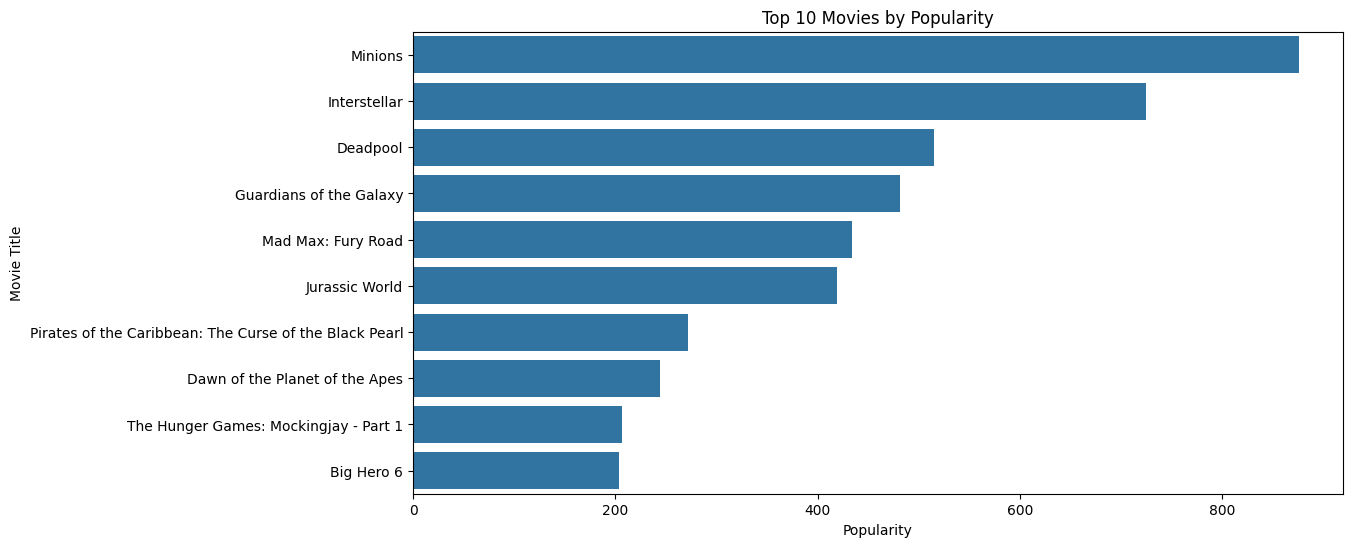

In [ ]:


top_10_movies = movies.sort_values('popularity', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='popularity', y='title', data=top_10_movies)
plt.title('Top 10 Movies by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Movie Title')
plt.show()

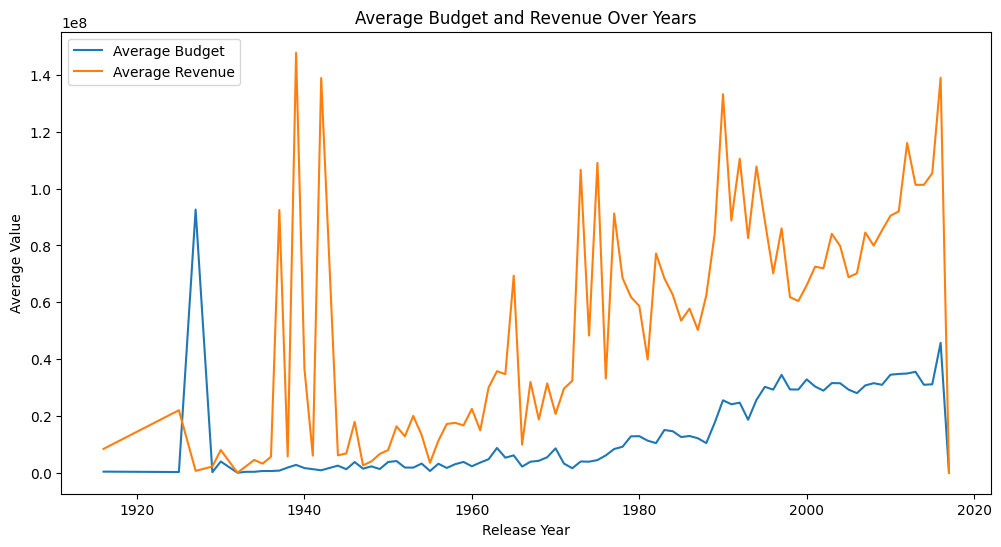

In [ ]:

movies['release_year'] = pd.to_datetime(movies['release_date'], errors='coerce').dt.year

# Group by release year and calculate the average of 'budget' and 'revenue'
yearly_avg = movies.groupby('release_year')[['budget', 'revenue']].mean()

# Plotting the line graph
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg.index, yearly_avg['budget'], label='Average Budget')
plt.plot(yearly_avg.index, yearly_avg['revenue'], label='Average Revenue')
plt.title('Average Budget and Revenue Over Years')
plt.xlabel('Release Year')
plt.ylabel('Average Value')
plt.legend()
plt.show()

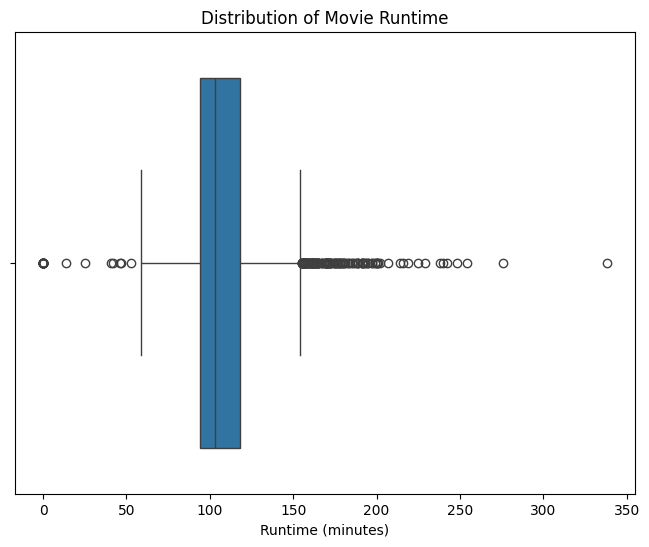

In [ ]:

plt.figure(figsize=(8, 6))
sns.boxplot(x=movies['runtime'])
plt.title('Distribution of Movie Runtime')
plt.xlabel('Runtime (minutes)')
plt.show()

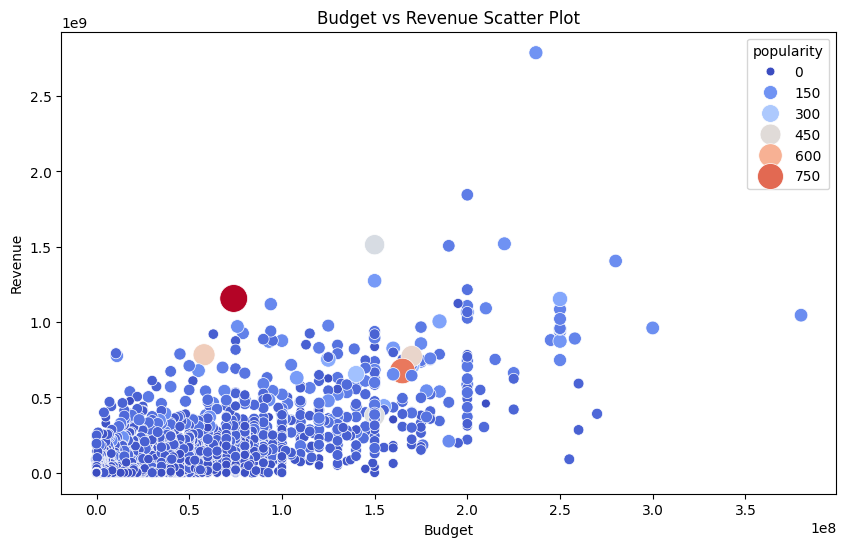

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=movies, hue='popularity', size='popularity', palette='coolwarm', sizes=(40, 400))
plt.title("Budget vs Revenue Scatter Plot")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.show()

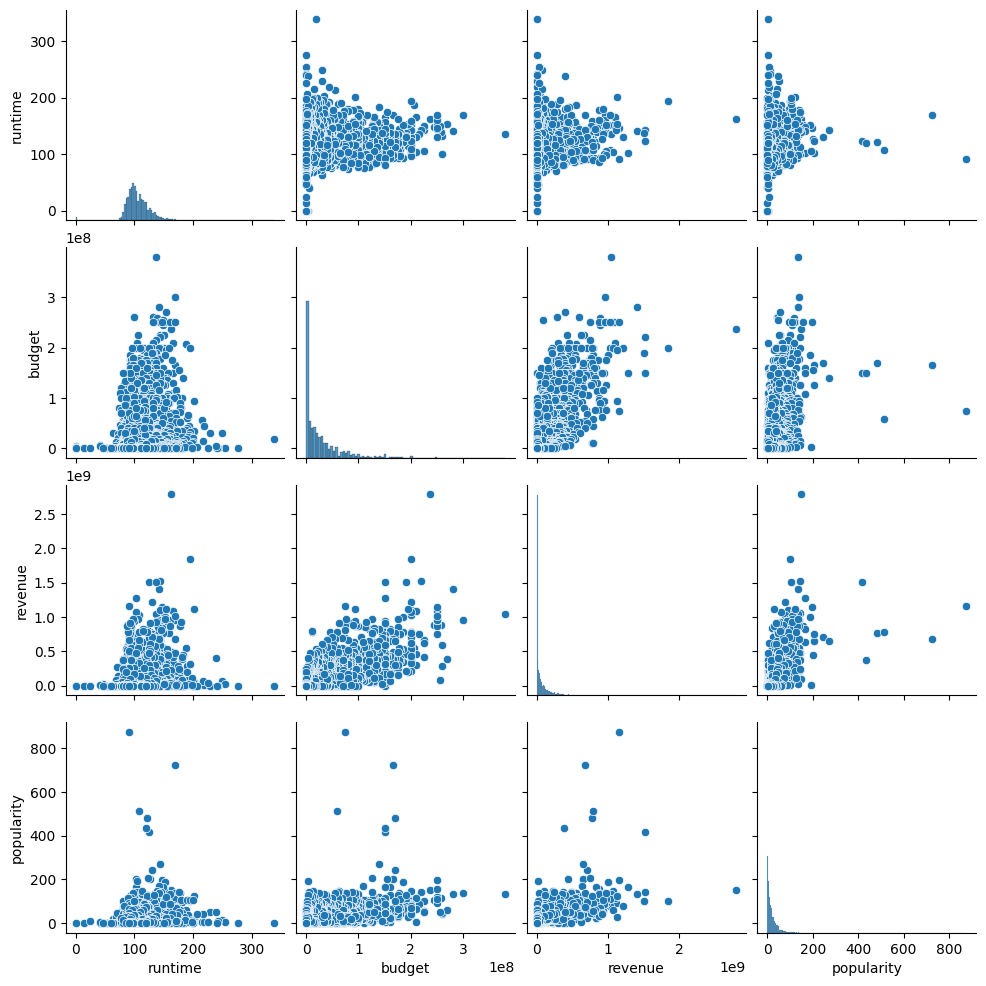

In [ ]:
numerical_cols = ['runtime', 'budget', 'revenue', 'popularity']
sns.pairplot(movies[numerical_cols])
plt.show()

               budget       revenue  popularity     runtime
cluster                                                    
0        4.983151e+07  1.868999e+08   49.108391  135.911917
1        1.707022e+07  4.249399e+07   17.273902   92.192101
2        1.897442e+08  1.017084e+09  199.579939  145.209302
3        2.904557e+07  6.796480e+07   25.828925  112.253521
4        1.320271e+08  4.639088e+08   63.326500  111.379310


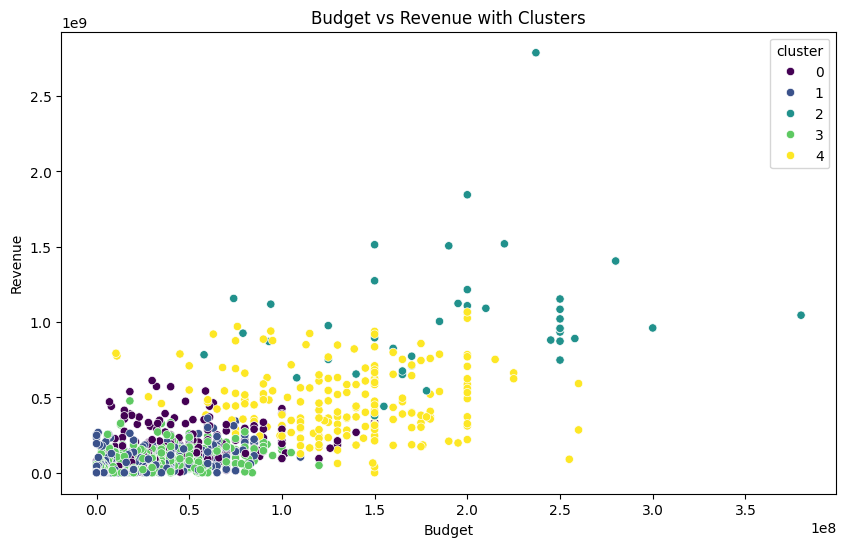

In [ ]:
# prompt: perform k - mean clustering algo

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select the features you want to use for clustering
features = ['budget', 'revenue', 'popularity', 'runtime']
movie_data = movies[features].dropna()  # Remove rows with missing values

# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(movie_data)

# Choose the number of clusters (k)
k = 5

# Create and fit the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_data)

# Add cluster labels to the original DataFrame
movies['cluster'] = kmeans.labels_

# Analyze the clusters (e.g., calculate average values for each cluster)
cluster_means = movies.groupby('cluster')[features].mean()
print(cluster_means)

# Visualize the clusters (e.g., using a scatter plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=movies, hue='cluster', palette='viridis')
plt.title("Budget vs Revenue with Clusters")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.show()

Mean Squared Error: 9435613156761828.0
R-squared: 0.6377336187011596


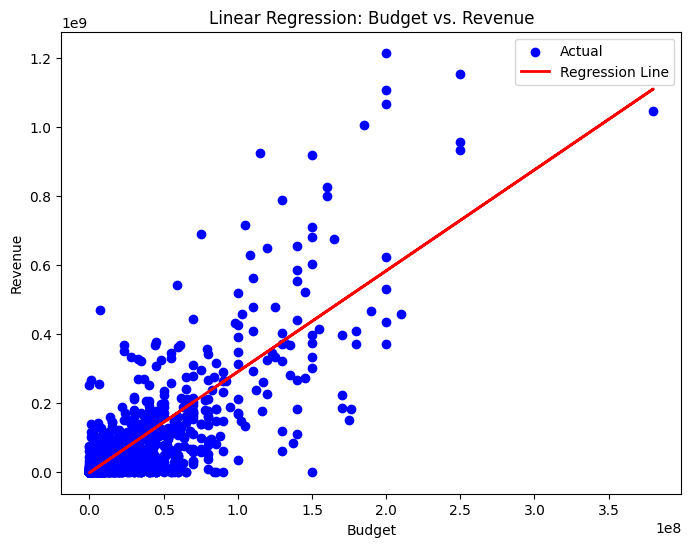

In [ ]:

import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

# Data Preprocessing (handle missing values, etc.)
movies.dropna(subset=['budget', 'revenue'], inplace=True)

# Feature Selection
X = movies[['budget']]  # Use budget as the independent variable
y = movies['revenue']   # Use revenue as the dependent variable


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Linear Regression: Budget vs. Revenue')
plt.legend()
plt.show()

Polynomial Regression - Mean Squared Error (MSE): 8200721937813263.0
Polynomial Regression - R-Squared (R2): 0.685145436645987


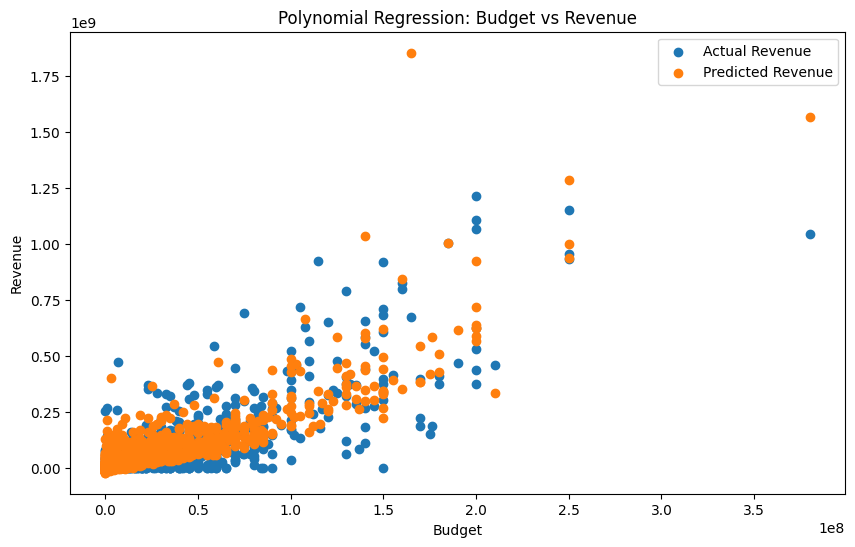

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
# Import SimpleImputer
from sklearn.impute import SimpleImputer

# Step 1: Prepare the data (same as before)
features = ['budget', 'runtime', 'popularity']
X = movies[features]
y = movies['revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Impute missing values (same as before)
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Step 3: Polynomial Regression
degree = 2  # You can adjust the degree of the polynomial
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X_train, y_train)

# Step 4: Predict
y_pred = poly_model.predict(X_test)

# Step 5: Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Polynomial Regression - Mean Squared Error (MSE): {mse}")
print(f"Polynomial Regression - R-Squared (R2): {r2}")

# Visualization (example with 'budget' vs 'revenue')
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test, label='Actual Revenue')  # Assuming 'budget' is the first feature
plt.scatter(X_test[:, 0], y_pred, label='Predicted Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Polynomial Regression: Budget vs Revenue')
plt.legend()
plt.show()

Mean Squared Error (MSE): 9127853256639836.0
R-Squared (R2): 0.6495496038919247
Explained Variance Ratio: [0.56158967 0.2743957 ]


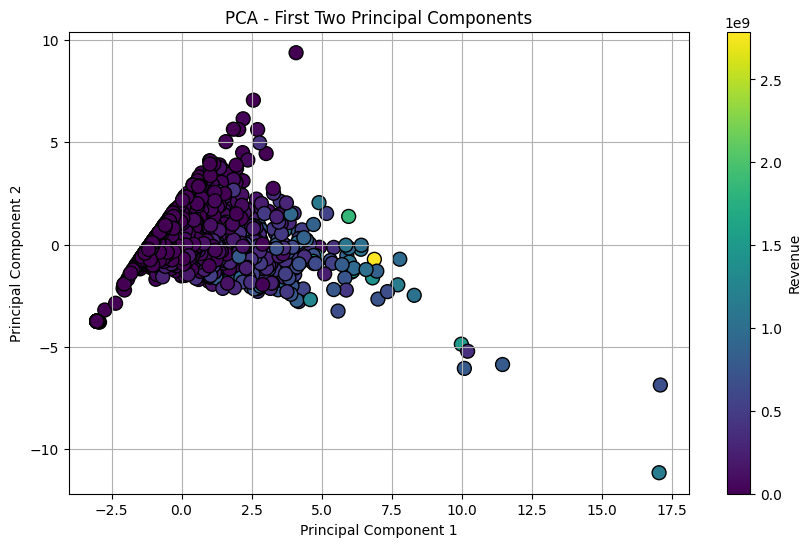

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Step 1: Prepare the data
features = ['budget', 'runtime', 'popularity']
X = movies[features]
y = movies['revenue']

# Step 2: Impute missing values before scaling
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
X_imputed = imputer.fit_transform(X)

# Step 3: Standardize the features (PCA works better with standardized data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)  # Use imputed data

# Step 4: Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components
X_pca = pca.fit_transform(X_scaled)

# Step 5: Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Step 6: Fit the Linear Regression Model on PCA-transformed data
linearModel = LinearRegression()
linearModel.fit(X_train, y_train)

# Step 7: Predict on Test Data
y_pred = linearModel.predict(X_test)

# Step 8: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-Squared (R2): {r2}")

# Display the explained variance ratio of each principal component
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

# Step 9: Visualizing the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title("PCA - First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Revenue')
plt.grid(True)
plt.show()

In [ ]:
movies.shape

(4803, 20)

In [ ]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
movies = movies.merge(credits,on='title')

In [ ]:
movies.head()
# budget
# homepage
# id
# original_language
# original_title
# popularity
# production_comapny
# production_countries
# release-date(not sure)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]

In [ ]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'movies' DataFrame is already loaded and processed as in the previous code

# Let's simplify the genres column for a basic classification example
def get_genre_list(genres_str):
  try:
    genres_list = eval(genres_str)  # Safely evaluate string as a Python list
    return [genre['name'] for genre in genres_list]
  except:
    return []

movies['genres_list'] = movies['genres'].apply(get_genre_list)
movies['genre_string'] = movies['genres_list'].apply(lambda x: ','.join(x))


# Select a smaller set of unique genres
unique_genres = set()
for genres_list in movies['genres_list']:
  for genre in genres_list:
    unique_genres.add(genre)
unique_genres = list(unique_genres)


# Creating a simplified classification task: classifying movies into 'Action' or 'Not Action'
movies['is_action'] = movies['genre_string'].apply(lambda x: 1 if 'Action' in x else 0)


# Split data into training and testing sets
X = movies['overview']
y = movies['is_action']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values in X_train and X_test before vectorization
# Replace NaN values with an empty string
X_train = X_train.fillna('')
X_test = X_test.fillna('')

# TF-IDF vectorization of text data (movie overviews)
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7837837837837838
              precision    recall  f1-score   support

           0       0.78      0.99      0.87       714
           1       0.86      0.19      0.32       248

    accuracy                           0.78       962
   macro avg       0.82      0.59      0.59       962
weighted avg       0.80      0.78      0.73       962



In [ ]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Split data into training and testing sets
X = movies['overview']
y = movies['is_action']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values in X_train and X_test before vectorization
# Replace NaN values with an empty string
X_train = X_train.fillna('')
X_test = X_test.fillna('')

# TF-IDF vectorization of text data (movie overviews)
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train an SVM classifier
svm_classifier = SVC(kernel='linear')  # You can experiment with different kernels (e.g., 'rbf', 'poly')
svm_classifier.fit(X_train_vec, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8232848232848233
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       714
           1       0.77      0.45      0.57       248

    accuracy                           0.82       962
   macro avg       0.80      0.70      0.73       962
weighted avg       0.82      0.82      0.81       962



In [ ]:


from sklearn.model_selection import cross_val_score, KFold

# ... (previous code)

# Split data into features (X) and target (y)
X = movies['overview']
y = movies['is_action']

# Handle missing values in X before vectorization
X = X.fillna('')

# TF-IDF vectorization of text data (movie overviews)
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_vec = vectorizer.fit_transform(X)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear')

# Define the number of folds for cross-validation
n_splits = 5  # You can adjust this value
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform cross-validation and get accuracy scores
cv_scores = cross_val_score(svm_classifier, X_vec, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores and the average accuracy
print("Cross-validation scores:", cv_scores)
print("Average accuracy:", cv_scores.mean())

Cross-validation scores: [0.82328482 0.81496881 0.83575884 0.7962578  0.82934443]
Average accuracy: 0.8199229406305368


In [ ]:
import ast

In [ ]:
def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name'])
    return L

In [ ]:
movies.isnull().sum()

,0
movie_id,0
title,0
overview,3
genres,0
keywords,0
cast,0
crew,0
genres_list,0
genre_string,0
is_action,0


In [ ]:
movies.dropna(inplace=True)

In [ ]:
movies['genres'] = movies['genres'].apply(convert)
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,genres_list,genre_string,is_action
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[Action, Adventure, Fantasy, Science Fiction]","Action,Adventure,Fantasy,Science Fiction",1
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[Adventure, Fantasy, Action]","Adventure,Fantasy,Action",1
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[Action, Adventure, Crime]","Action,Adventure,Crime",1
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[Action, Crime, Drama, Thriller]","Action,Crime,Drama,Thriller",1
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[Action, Adventure, Science Fiction]","Action,Adventure,Science Fiction",1


In [ ]:
movies['keywords'] = movies['keywords'].apply(convert)
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,genres_list,genre_string,is_action
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[Action, Adventure, Fantasy, Science Fiction]","Action,Adventure,Fantasy,Science Fiction",1
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[Adventure, Fantasy, Action]","Adventure,Fantasy,Action",1
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[Action, Adventure, Crime]","Action,Adventure,Crime",1
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[Action, Crime, Drama, Thriller]","Action,Crime,Drama,Thriller",1
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[Action, Adventure, Science Fiction]","Action,Adventure,Science Fiction",1


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4806 entries, 0 to 4808
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie_id      4806 non-null   int64 
 1   title         4806 non-null   object
 2   overview      4806 non-null   object
 3   genres        4806 non-null   object
 4   keywords      4806 non-null   object
 5   cast          4806 non-null   object
 6   crew          4806 non-null   object
 7   genres_list   4806 non-null   object
 8   genre_string  4806 non-null   object
 9   is_action     4806 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 413.0+ KB


In [ ]:
import ast
ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [ ]:
def convert3(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            L.append(i['name'])
        counter+=1
    return L

In [ ]:
movies['cast'] = movies['cast'].apply(convert)
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,genres_list,genre_string,is_action
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[Action, Adventure, Fantasy, Science Fiction]","Action,Adventure,Fantasy,Science Fiction",1
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[Adventure, Fantasy, Action]","Adventure,Fantasy,Action",1
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[Action, Adventure, Crime]","Action,Adventure,Crime",1
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[Action, Crime, Drama, Thriller]","Action,Crime,Drama,Thriller",1
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[Action, Adventure, Science Fiction]","Action,Adventure,Science Fiction",1


In [ ]:
movies['cast'] = movies['cast'].apply(lambda x:x[0:3])

In [ ]:
def fetch_director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L

In [ ]:
#movies['overview'] = movies['overview'].apply(lambda x:x.split())
movies.sample(5)

,movie_id,title,overview,genres,keywords,cast,crew,genres_list,genre_string,is_action
1442,18886,Flight of the Intruder,U.S. Navy pilot Lt. Jake Grafton and his bomba...,"[Action, Adventure, Drama, Thriller]","[bomber, vietnam war, u.s. navy, aviation, com...","[Danny Glover, Willem Dafoe, Brad Johnson]","[{""credit_id"": ""52fe47a69251416c750a0d47"", ""de...","[Action, Adventure, Drama, Thriller]","Action,Adventure,Drama,Thriller",1
4014,126509,2016: Obama's America,2016: Obama's America takes audiences on a gri...,[Documentary],[],[],"[{""credit_id"": ""52fe4ae1c3a368484e16bcd7"", ""de...",[Documentary],Documentary,0
2355,11457,Life as a House,"When a man is diagnosed with terminal cancer, ...",[Drama],"[father son relationship, house, cancer, drug,...","[Kevin Kline, Kristin Scott Thomas, Hayden Chr...","[{""credit_id"": ""52fe44449251416c7502ea11"", ""de...",[Drama],Drama,0
1770,5126,Martian Child,"A recently-widowed, science fiction writer con...",[Drama],"[underdog, adoption, education, adoptive fathe...","[John Cusack, Bobby Coleman, Amanda Peet]","[{""credit_id"": ""52fe43f5c3a36847f807a7d7"", ""de...",[Drama],Drama,0
3224,19644,Silmido,"On 31 January 1968, 31 North Korean commandos ...","[Action, Drama, History]","[prison, island, korea]","[Sol Kyung-gu, Heo Jun-ho, Ahn Sung-Ki]","[{""credit_id"": ""53d8229f0e0a261c87000b47"", ""de...","[Action, Drama, History]","Action,Drama,History",1


In [ ]:
def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [ ]:
movies['cast'] = movies['cast'].apply(collapse)
movies['crew'] = movies['crew'].apply(collapse)
movies['genres'] = movies['genres'].apply(collapse)
movies['keywords'] = movies['keywords'].apply(collapse)

In [ ]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,genres_list,genre_string,is_action
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]","[[, {, "", c, r, e, d, i, t, _, i, d, "", :, , ""...","[Action, Adventure, Fantasy, Science Fiction]","Action,Adventure,Fantasy,Science Fiction",1
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]","[[, {, "", c, r, e, d, i, t, _, i, d, "", :, , ""...","[Adventure, Fantasy, Action]","Adventure,Fantasy,Action",1
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]","[[, {, "", c, r, e, d, i, t, _, i, d, "", :, , ""...","[Action, Adventure, Crime]","Action,Adventure,Crime",1
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]","[[, {, "", c, r, e, d, i, t, _, i, d, "", :, , ""...","[Action, Crime, Drama, Thriller]","Action,Crime,Drama,Thriller",1
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]","[[, {, "", c, r, e, d, i, t, _, i, d, "", :, , ""...","[Action, Adventure, Science Fiction]","Action,Adventure,Science Fiction",1


In [ ]:
movies['overview'] = movies['overview'].apply(lambda x:x.split())

In [ ]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [ ]:
new = movies.drop(columns=['overview','genres','keywords','cast','crew'])
#new.head()

In [ ]:
new['tags'] = new['tags'].apply(lambda x: " ".join(x))
new.head()

,movie_id,title,genres_list,genre_string,is_action,tags
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","Action,Adventure,Fantasy,Science Fiction",1,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","Adventure,Fantasy,Action",1,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,"[Action, Adventure, Crime]","Action,Adventure,Crime",1,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","Action,Crime,Drama,Thriller",1,Following the death of District Attorney Harve...
4,49529,John Carter,"[Action, Adventure, Science Fiction]","Action,Adventure,Science Fiction",1,"John Carter is a war-weary, former military ca..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')


In [ ]:
vector = cv.fit_transform(new['tags']).toarray()

In [ ]:
vector.shape

(4806, 5000)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity = cosine_similarity(vector)

In [ ]:
similarity

array([[1.        , 0.08858079, 0.05905386, ..., 0.02478408, 0.02739983,
        0.        ],
       [0.08858079, 1.        , 0.06451613, ..., 0.02707652, 0.        ,
        0.        ],
       [0.05905386, 0.06451613, 1.        , ..., 0.02707652, 0.        ,
        0.        ],
       ...,
       [0.02478408, 0.02707652, 0.02707652, ..., 1.        , 0.07537784,
        0.0489116 ],
       [0.02739983, 0.        , 0.        , ..., 0.07537784, 1.        ,
        0.05407381],
       [0.        , 0.        , 0.        , ..., 0.0489116 , 0.05407381,
        1.        ]])

In [ ]:
new[new['title'] == 'The Lego Movie'].index[0]

744

In [ ]:
def recommend(movie):
    index = new[new['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(new.iloc[i[0]].title)

In [ ]:
recommend('Avatar')

Titan A.E.
Small Soldiers
Independence Day
Aliens vs Predator: Requiem
Ender's Game


In [ ]:
recommend('The Dark Knight Rises')

The Dark Knight
Batman
Batman Begins
Batman Returns
Batman


In [ ]:
recommend('The Avengers')

Avengers: Age of Ultron
Captain America: Civil War
Iron Man 3
Captain America: The First Avenger
Iron Man


In [ ]:
recommend('Inception')

Duplex
The Helix... Loaded
Star Trek II: The Wrath of Khan
Timecop
Chicago Overcoat


In [ ]:
recommend('Titanic')

Raise the Titanic
Captain Phillips
The Notebook
In the Heart of the Sea
Ghost Ship


In [ ]:
import pickle
pickle.dump(new,open('movie_list.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))